# Book Recommendation

oleh: Aditya Atallah

dataset: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data

## Preparing

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahdithya","key":"0a0e8c092757aec2f0c6d9c9906bf84a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 71% 17.0M/23.8M [00:00<00:00, 77.2MB/s]
100% 23.8M/23.8M [00:00<00:00, 90.0MB/s]


In [5]:
!unzip book-recommendation-dataset.zip

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: recsys_taxonomy2.png    


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

## Data Collecting

In [7]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')


<ipython-input-7-f6677f1956ea>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Exploratory Data Analysis

#### Univariate

##### Books

In [11]:
# Melihat info data
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


pada variable Year-of-Publication, type data bernilai object yang harusnya menjadi int

In [12]:
# mengubah type data
books = books[(books['Year-Of-Publication'] !=  'DK Publishing Inc') & (books['Year-Of-Publication'] !=  'Gallimard')]
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int')
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271356 non-null  object
 3   Year-Of-Publication  271357 non-null  int64 
 4   Publisher            271355 non-null  object
 5   Image-URL-S          271357 non-null  object
 6   Image-URL-M          271357 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


In [13]:
# melakukan drop pada variable Image-URL-S, Image-URL-M, Image-URL-L
books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

In [14]:
print('Jumlah ISBN Buku', len(books['ISBN'].unique()))
print('Jumlah Judul Buku', len(books['Book-Title'].unique()))
print('Jumlah Penulis Buku', len(books['Book-Author'].unique()))
print('Jumlah Tahun Terbit buku', len(books['Year-Of-Publication'].unique()))
print('Jumlah Penerbit Buku', len(books['Publisher'].unique()))

Jumlah ISBN Buku 271357
Jumlah Judul Buku 242132
Jumlah Penulis Buku 102022
Jumlah Tahun Terbit buku 116
Jumlah Penerbit Buku 16805


##### Ratings

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [16]:
print('Jumlah User ID:', len(ratings['User-ID'].unique()))
print('Jumlah ISBN buku:', len(ratings['ISBN'].unique()))

Jumlah User ID: 105283
Jumlah ISBN buku: 340556


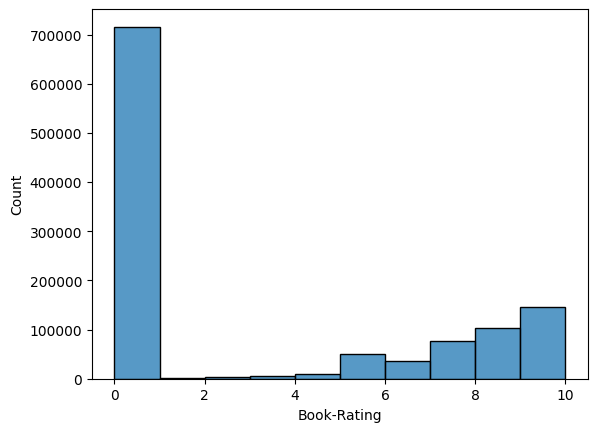

In [17]:
sns.histplot(ratings['Book-Rating'], bins=10)
plt.show()

##### Users

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Jumlah User ID: 105283 



<function matplotlib.pyplot.show(close=None, block=None)>

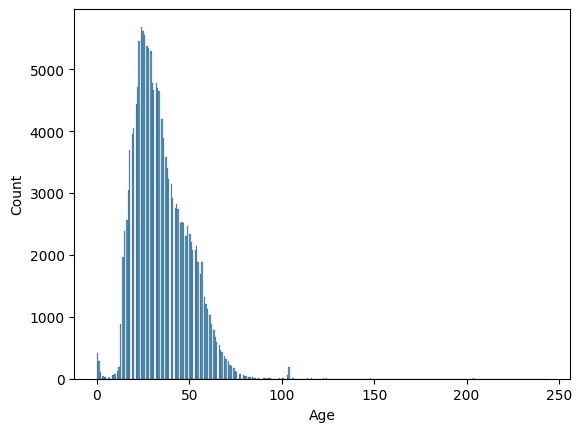

In [19]:
print('Jumlah User ID:', len(ratings['User-ID'].unique()), '\n')

sns.histplot(users['Age'])
plt.show

## Data Preparation

### Integration Data

In [20]:
# menggabungkan data untuk pemodelan
books_rating =  pd.merge(ratings, books, on='ISBN', how='left')
books_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press


### Missing Value

In [21]:
# mengecek missing value
books_rating.isna().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118648
Book-Author            118649
Year-Of-Publication    118648
Publisher              118650
dtype: int64

In [22]:
# menghapus nilai missing value
books_clean = books_rating.dropna()
books_clean.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [23]:
books_clean.shape

(1031129, 7)

In [24]:
# menghapus nilai rating yang bernilai 0
books_clean = books_clean[(books_clean['Book-Rating'] != 0)]
books_clean.shape

(383838, 7)

### Duplicated

In [25]:
# menghapus duplikat pada data
fix_books = books_clean.drop_duplicates('ISBN')

In [26]:
# mengubah tipe data year-ofpublication
fix_books['Year-Of-Publication'] =fix_books['Year-Of-Publication'].astype('int')
fix_books.info()

<ipython-input-26-acd7dd57ccc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_books['Year-Of-Publication'] =fix_books['Year-Of-Publication'].astype('int')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149832 entries, 1 to 1149773
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              149832 non-null  int64 
 1   ISBN                 149832 non-null  object
 2   Book-Rating          149832 non-null  int64 
 3   Book-Title           149832 non-null  object
 4   Book-Author          149832 non-null  object
 5   Year-Of-Publication  149832 non-null  int64 
 6   Publisher            149832 non-null  object
dtypes: int64(3), object(4)
memory usage: 9.1+ MB


In [27]:
# Mempersiapkan data untuk model

preparation = fix_books
preparation.sort_values('ISBN')

isbn = preparation['ISBN'].tolist()
title = preparation['Book-Title'].tolist()
rating = preparation['Book-Rating'].tolist()
author = preparation['Book-Author'].tolist()
publication = preparation['Year-Of-Publication'].tolist()
publisher = preparation['Publisher'].tolist()

print(len(isbn))
print(len(title))
print(len(rating))
print(len(author))
print(len(publication))
print(len(publisher))

149832
149832
149832
149832
149832
149832


Jumlah data berukuran sama sehingga dapat digunakan untuk pemodelan

In [28]:
books_df = pd.DataFrame({
    'ISBN': isbn,
    'Rating': rating,
    'Title': title,
    'Author': author,
    'Publication': publication,
    'Publisher': publisher
})

In [29]:
books_df.head()

,ISBN,Rating,Title,Author,Publication,Publisher
0,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
1,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
4,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch


In [30]:
# karena laptop saya cukup berat menjalankan komputasi maka data yang banyak maka akan melakukan sampling secara acak sebanyak 10000 data
books_sample = books_df.sample(n=10000, random_state=123)

## Modeling and Result

### Content Based Filtering

In [31]:
data = books_sample
data.sample(5)

,ISBN,Rating,Title,Author,Publication,Publisher
80587,0874312108,9,Star Wars Imperial Sourcebook,Schweigh,1993,West End Games
134191,0939416115,8,Sex Work: Writings by Women in the Sex Industry,Frederique Delacoste,1988,Pub Group West
142513,0771053053,9,Touched by Fire: Doctors Without Borders in a ...,Elliott Leyton,1998,McClelland &amp; Stewart Ltd
47433,0688075096,10,Tales of Edgar Allan Poe (Books of Wonder),Edgar Allan Poe,1991,HarperCollins
116819,0553239163,10,Belles on Their Toes,"Frank B., Jr. Gilbreth",1984,Bantam Books


#### TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
tfid.fit(data['Author'])

TfidfVectorizer()

In [33]:
tfidf_matrix = tfid.fit_transform(data['Author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(10000, 7215)

In [34]:
# melihat hasil representasi fitur
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=data.Title
).sample(22, axis=1).sample(10, axis=0)

,stahl,dickey,barney,benford,morrisey,lovejoy,del,morelli,julianne,creech,...,jimã,candice,crispin,maud,lian,iris,neely,schulze,tamora,whelan
Title,,,,,,,,,,,,,,,,,,,,,
"The Ramona Collection, Volume 2 (Cleary Reissue)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Hovering of Vultures,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Le Vallon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tales of Edgar Allan Poe (Books of Wonder),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Death In Venice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spider-Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Edwin Pope Collection (Contemporary American Sportswriters),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
By Arrangement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
What's Your Type of Career?: Unlock the Secrets of Your Personality to Find Your Perfect Career Path,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cosine Similarity

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Title'], columns=data['Title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10000, 10000)


Title,Stormbreaker (Alex Rider Adventure),Strange City: Anthology (The World of Darkness),The Writings of Christine De Pizan,Parts,Great Ghost Stories
Title,,,,,
Prayers from the Ark and The Creatures' Choir,0.0,0.0,0.0,0.0,0.0
INTENT TO HARM : INTENT TO HARM,0.0,0.0,0.0,0.0,0.0
Endangered Species: Portraits of a Dying Millenium,0.0,0.0,0.0,0.0,0.0
Travelers' Tales Cuba: True Stories,0.0,0.0,0.0,0.0,0.0
Harbour Lights: Burlington Bay,0.0,0.0,0.0,0.0,0.0
"Hollywood Hell (Don Pendleton's Executioner Mac Bolan, No 77)",0.0,0.0,0.0,0.0,0.0
Encourage Me,0.0,0.0,0.0,0.0,0.0
Free Again (Phantom Stallion #5),0.0,0.0,0.0,0.0,0.0
Rosamund,0.0,0.0,0.0,0.0,0.0


In [37]:
def book_recommendations(title, similarity_data=cosine_sim_df, items=data[['Title', 'Author']], k=10):
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [38]:
data.Title.sample(5)

125202    Dancing With the Devil: The Windsors and Jimmy...
77072          Kate Hannigan : A Novel (Ay Adult - Cookson)
27462       Tatry: GÃ³ry najpiekniejsze = The Tatra : spell
94272                                    PRIZE STORIES 1988
18868                                       HOLLYWOOD WIVES
Name: Title, dtype: object

In [39]:
data[data.Title.eq("Second Inspector Thanet")]

,ISBN,Rating,Title,Author,Publication,Publisher
115365,0751513962,8,Second Inspector Thanet,Dorothy Simpson,1995,Little Brown and Company


#### Result

In [40]:
# menampilkan rekomendasi buku berdasarkan author
book_recommendations('Second Inspector Thanet')

,Title,Author
0,Doomed to Die,Dorothy Simpson
1,Night She Died -Op/67,Dorothy Simpson
2,Close Her Eyes,Dorothy Simpson
3,Male Impersonators: Men Performing Masculinity,Mark Simpson
4,Windows 98 To Go,Alan Simpson
5,The Authentic Annals of the Early Hebrews,Wayne Simpson
6,American Elegy: A Family Memoir,Jeffrey Simpson
7,"Mccain'S Memories (Intimate Moments, No 785)",Maggie Simpson
8,James Whitcomb Riley Cookbook (Hoosier Hearths...,Dorothy J. Williams
9,Anywhere but here (Vintage contemporaries),Mona Simpson


### Collaborative Filtering

#### Data Preparation

In [41]:
# karena data yang terlalu banyak menyebabkan kegagalan saat melakukan komputasi maka hanya akan diambil 10000 data saja
ratings_sample = ratings.sample(n=10000, random_state=123).reset_index()

In [42]:
df = ratings_sample
df.head()

,index,User-ID,ISBN,Book-Rating
0,229535,52917,1558534202,6
1,817972,198711,0394426290,0
2,101577,23768,0375412530,0
3,1123282,269566,0446605484,0
4,339655,81050,1586480375,7


In [43]:
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke UserID: ', user_encoded_to_user)

list userID:  [52917, 198711, 23768, 269566, 81050, 183088, 206534, 148744, 217740, 3363, 11676, 156264, 95010, 32195, 128835, 261829, 225989, 227447, 81088, 97324, 151608, 100098, 40754, 277639, 119594, 97423, 178522, 88122, 91745, 264543, 118365, 177180, 156150, 189678, 81492, 25981, 277187, 11724, 104399, 158421, 234948, 266491, 42400, 144031, 94241, 82751, 275573, 233911, 36554, 146156, 238120, 176902, 40943, 114988, 196393, 174791, 130571, 196523, 224525, 224764, 48364, 207825, 211426, 78783, 71259, 151877, 14638, 95359, 252695, 55548, 36839, 59038, 71752, 17507, 179978, 162639, 231210, 214023, 238890, 142468, 7898, 107044, 146428, 166596, 246104, 94923, 273071, 204864, 35050, 247176, 251791, 216882, 176062, 196109, 228764, 189516, 75860, 195116, 167800, 23511, 116210, 266866, 164096, 253114, 87143, 188273, 135149, 243942, 56276, 223210, 249924, 212898, 152786, 61901, 26598, 204644, 220171, 245371, 102967, 200557, 81977, 98391, 197659, 113519, 29259, 263149, 235105, 76352, 36003, 

In [44]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
books_ids = df['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(books_ids)}

# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(books_ids)}

In [45]:
# Mapping kedalam variable baru
df['user'] = df['User-ID'].map(user_to_user_encoded)
df['ISBN-Book'] = df['ISBN'].map(book_to_book_encoded)

In [46]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_books = len(book_encoded_to_book)
print(num_books)

df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Nilai minimum Book-Rating
min_rating = min(df['Book-Rating'])

# Nilai maksimal Book-Rating
max_rating = max(df['Book-Rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

5367
8847
Number of User: 5367, Number of Resto: 8847, Min Rating: 0.0, Max Rating: 10.0


#### Spliting Data

In [47]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,index,User-ID,ISBN,Book-Rating,user,ISBN-Book
6252,835122,201768,0312925883,0.0,3093,5727
4684,268357,62272,0385502532,0.0,1398,3224
1731,613604,148514,0892435666,0.0,1016,1673
4742,1073327,256507,0553271636,0.0,2140,4411
4521,1117870,268171,0441004016,9.0,2938,4217
...,...,...,...,...,...,...
5734,273015,63714,0707304466,10.0,889,5278
5191,76092,16538,0345353145,9.0,3259,1401
5390,544495,130658,0515135062,0.0,379,4973
860,916536,223354,0312421273,10.0,726,838


In [48]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'ISBN-Book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[3093 5727]
 [1398 3224]
 [1016 1673]
 ...
 [ 379 4973]
 [ 726  838]
 [2280 6592]] [0. 0. 0. ... 0. 1. 0.]


#### Modeling

In [49]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings books
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_books, 1) # layer embedding books bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation

In [50]:
model = RecommenderNet(num_users, num_books, 50)
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [51]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 [==============================] - 19s 10ms/step - loss: 0.6890 - root_mean_squared_error: 0.4378 - val_loss: 0.6837 - val_root_mean_squared_error: 0.4344
Epoch 2/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6352 - root_mean_squared_error: 0.4062 - val_loss: 0.6750 - val_root_mean_squared_error: 0.4291
Epoch 3/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.5645 - root_mean_squared_error: 0.3651 - val_loss: 0.6697 - val_root_mean_squared_error: 0.4258
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5457 - root_mean_squared_error: 0.3549 - val_loss: 0.6649 - val_root_mean_squared_error: 0.4230
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5306 - root_mean_squared_error: 0.3459 - val_loss: 0.6596 - val_root_mean_squared_error: 0.4199
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5146 - root_mean_squared_error: 0.3367 - val

#### Visualiasi Metrik

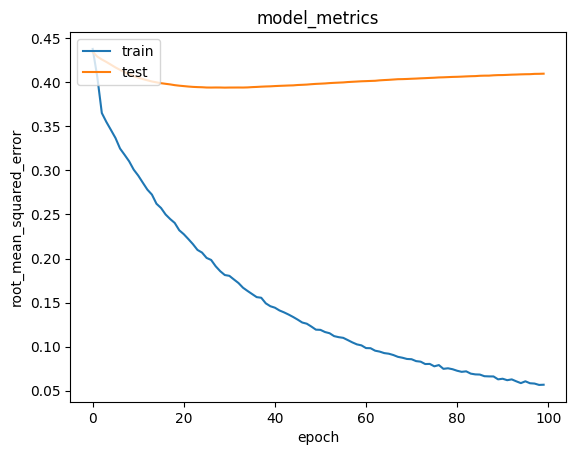

In [52]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Result

In [53]:
books_df = books
df_ratings = ratings_sample

# mengambil sample user
user_id = df_ratings['User-ID'].sample(1).iloc[0]
book_read_by_user = df_ratings[df_ratings['User-ID'] == user_id]


book_no_read = books_df[~books_df['ISBN'].isin(book_read_by_user['User-ID'].values)]['ISBN']
book_no_read = list(
    set(book_no_read)
    .intersection(set(book_to_book_encoded.keys()))
)

book_no_read = [[book_to_book_encoded.get(x)] for x in book_no_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_no_read), book_no_read)
)

In [54]:
rating = model.predict(user_book_array).flatten()

top_ratings_indices = rating.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_no_read[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Books with high ratings from user')
print('----' * 8)

top_books_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

books_df_rows = books_df[books_df['ISBN'].isin(top_books_user)]
for row in books_df_rows.itertuples():
    print(row._2, ':', row._3)

print('----' * 8)
print('Top 10 Books recommendation')
print('----' * 8)

recommended_books = books_df[books_df['ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row._2, ':', row._3)

247/247 [==============================] - 1s 2ms/step
Showing recommendations for users: 206109
Books with high ratings from user
--------------------------------
Bridal Bargains: Secrets to Throwing a Fantastic Wedding on a Realistic Budget (Bridal Bargains: Secrets to Throwing a Fantastic Wedding on a Realistic Budget) : Denise Fields
--------------------------------
Top 10 Books recommendation
--------------------------------
Seabiscuit: An American Legend : LAURA HILLENBRAND
The Phantom Tollbooth : Norton Juster
Cold Sassy Tree : Olive Ann Burns
Point of Origin : Patricia Daniels Cornwell
Tis: A Memoir : Frank McCourt
Forbidden Magic : Jo Beverley
Nicolae: The Rise of Antichrist (Left Behind No. 3) : Tim F. Lahaye
The Sisterhood of the Traveling Pants : Ann Brashares
Attack Of The Deranged Mutant Killer Snow Goons : Bill Watterson
Message from Nam : Danielle Steel


## Evaluation

### Content Based Filtering

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score


# menentukan batasan similarity 1 atau 0
threshold = 0.5

# rekomendasi berdasarkan judul
true_title = 'Second Inspector Thanet'
predicted_books = book_recommendations(true_title, similarity_data=cosine_sim_df, items=data[['Title', 'Author']], k=10)

#  Menyusun data label_truth dengan asumsi threshold
label_truth = np.where(cosine_sim_df >= threshold, 1, 0)

# Mengambil subset dari matriks similarity dan label_truth
sample_size = 10000
cosine_sim_sample = cosine_sim_df.iloc[:sample_size, :sample_size]
label_truth_sample = label_truth[:sample_size, :sample_size]

# Mengonversi matriks similarity menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.values.flatten()

# Mengonversi matriks label_truth menjadi array satu dimensi
label_truth_flat = label_truth_sample.flatten()

# Menghitung metrik evaluasi
precision = precision_score(label_truth_flat, (cosine_sim_flat >= threshold).astype(int), zero_division=1)
recall = recall_score(label_truth_flat, (cosine_sim_flat >= threshold).astype(int), zero_division=1)
f1 = f1_score(label_truth_flat, (cosine_sim_flat >= threshold).astype(int), zero_division=1)

evaluation_result = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Value': [precision, recall, f1]
})



In [62]:
evaluation_result

,Metric,Value
0,Precision,1.0
1,Recall,1.0
2,F1-Score,1.0


### Collaborative Filtering

In [70]:
from sklearn.metrics import mean_squared_error

# Prediksi rating untuk buku yang tidak dibaca oleh user
predicted_ratings = model.predict(user_book_array).flatten()

# Ambil rating sebenarnya untuk buku yang tidak dibaca oleh user
true_ratings = np.array([
    df_ratings[
        (df_ratings['User-ID'] == user_id) &
        (df_ratings['ISBN'] == book_encoded_to_book.get(book_id))
    ]['Book-Rating'].values[0]
    if not df_ratings[
        (df_ratings['User-ID'] == user_id) &
        (df_ratings['ISBN'] == book_encoded_to_book.get(book_id))
    ].empty
    else 0  # Atau nilai default sesuai kebutuhan Anda
    for book_id in recommended_book_ids
])

# Pastikan panjang true_ratings dan predicted_ratings sama
min_len = min(len(true_ratings), len(predicted_ratings))
true_ratings = true_ratings[:min_len]
predicted_ratings = predicted_ratings[:min_len]

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

print(f'RMSE: {rmse}')

247/247 [==============================] - 1s 3ms/step
RMSE: 0.4652476037010383
